<a href="https://colab.research.google.com/github/YusufAbdurrahmann/car-price-regression/blob/main/car_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# **Data Import**

In [2]:
df = pd.read_csv("sample_data/toyota.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


# **Data Understanding**

In [3]:
df["model"].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [4]:
df.shape

(6738, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


# **Data Cleaning**

In [6]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [7]:
df.duplicated().sum()

np.int64(39)

In [8]:
df = df.drop_duplicates()

# **Explanatory Data Analysis (EDA)**

<ipython-input-24-34789296326b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = "year", palette = "pastel")


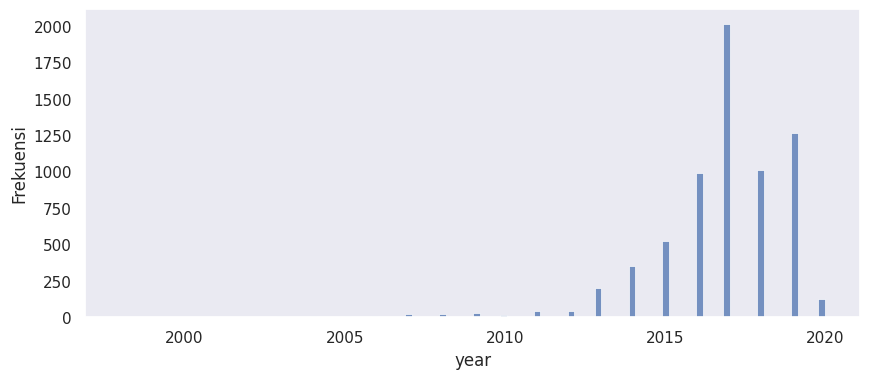

In [24]:
plt.figure(figsize = (10,4))
sns.set_theme(style = "dark")
sns.histplot(data = df, x = "year", palette = "pastel")
plt.ylabel("Frekuensi")
plt.show()

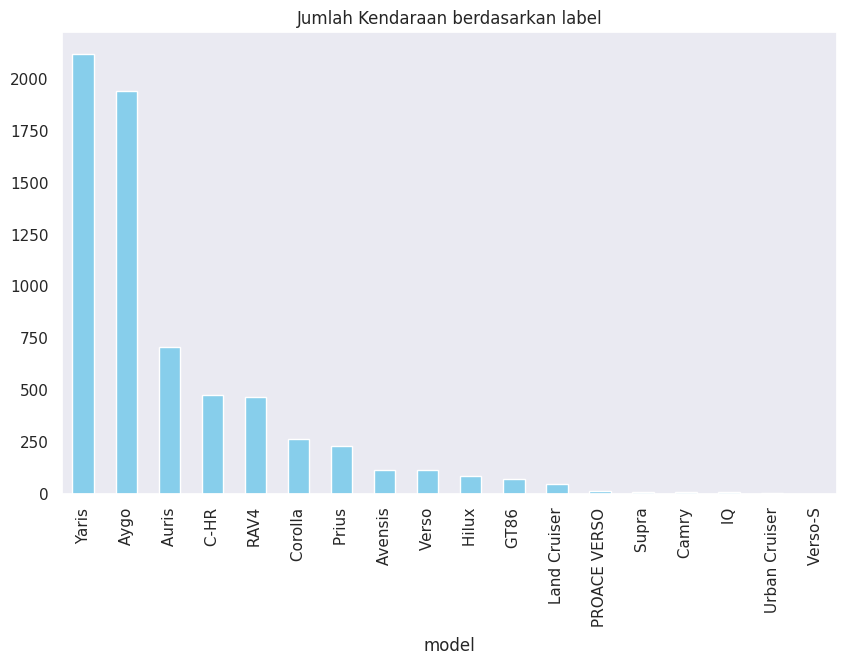

In [22]:
plt.figure(figsize = (10,6))
df["model"].value_counts().plot(kind = "bar", color = "skyblue")
plt.title("Jumlah Kendaraan berdasarkan label")
plt.show()

<ipython-input-28-f2cfae8b338b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

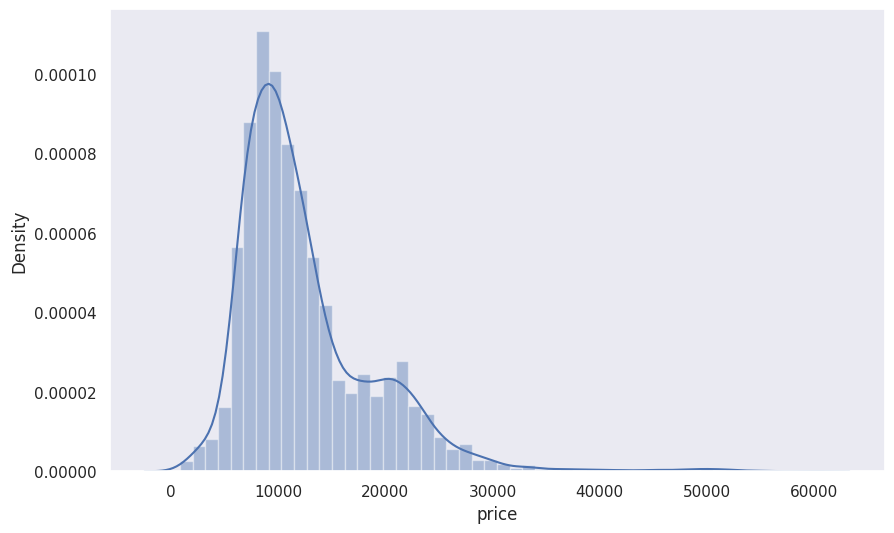

In [28]:
plt.figure(figsize = (10,6))
sns.set_theme(style = "dark")
sns.distplot(df["price"])

In [30]:
nilai_tukar_euro_ke_rupiah = 1784640

df["price"] = df["price"] * nilai_tukar_euro_ke_rupiah
df["tax"] = df["tax"] * nilai_tukar_euro_ke_rupiah

In [32]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
386,RAV4,2016,42813513600,Automatic,20101,Hybrid,35692800,55.4,2.5
6526,Verso,2011,14268196800,Manual,29761,Diesel,258772800,53.3,2.0
4441,Aygo,2017,14651894400,Manual,8606,Petrol,0,68.9,1.0
2917,Yaris,2011,10689993600,Manual,38000,Petrol,223080000,51.4,1.3
25,GT86,2020,55323840000,Manual,3000,Petrol,258772800,33.2,2.0


# **Data Preperation**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6699 non-null   object 
 1   year          6699 non-null   int64  
 2   price         6699 non-null   int64  
 3   transmission  6699 non-null   object 
 4   mileage       6699 non-null   int64  
 5   fuelType      6699 non-null   object 
 6   tax           6699 non-null   int64  
 7   mpg           6699 non-null   float64
 8   engineSize    6699 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 523.4+ KB


In [37]:
md = LabelEncoder()
ts = LabelEncoder()
ft = LabelEncoder()

df["model"] = md.fit_transform(df["model"])
df["transmission"] = ts.fit_transform(df["transmission"])
df["fuelType"] = ft.fit_transform(df["fuelType"])

In [38]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6589,7,2019,42813513600,1,10663,0,464006400,40.4,2.4
6430,1,2014,7013635200,1,142000,0,53539200,62.8,2.0
1945,17,2017,21406756800,1,3325,3,258772800,56.5,1.5
6105,11,2017,32123520000,0,52926,1,240926400,94.1,1.8
679,12,2007,7843492800,1,73000,0,419390400,42.8,2.2


In [52]:
X = df.drop(columns = ["price"])
y = df["price"]

In [55]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Modelling**

In [59]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
score = lr.score(X_test, y_test)

print("Accuracy : {:.2f}%".format(score*100))

Accuracy : 79.10%
